In [3]:
import pickle as pickle
import os
import pandas as pd
import torch
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
def preprocessing_dataset(dataset):
  """ 처음 불러온 csv 파일을 원하는 형태의 DataFrame으로 변경 시켜줍니다."""
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[0].split(':')[1]
    j = j[1:-1].split(',')[0].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label']})
  return out_dataset

In [5]:
def load_data(dataset_dir):
  """ csv 파일을 경로에 맡게 불러 옵니다. """
  pd_dataset = pd.read_csv(dataset_dir)
  dataset = preprocessing_dataset(pd_dataset)
  
  return dataset

In [6]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [7]:
dataset = load_data('/opt/ml/dataset/train/train.csv')
label = label_to_num(dataset['label'].values)

In [8]:
dataset.sample(5)

,id,sentence,subject_entity,object_entity,label
26388,26388,"중세 시대부터 이미 이곳에서 많은 학생들이 공부하면서 학문의 중심지로 여겨졌으며, ...",'카르티에 라탱','프랑스',no_relation
21963,21963,2008년 한국시리즈에서 두산 베어스를 상대로 한국시리즈 최초 4홀드를 기록하였다.,'두산 베어스','2008년',no_relation
2312,2312,병정에서 미카사가 오른팔 손목에 아즈마비토 가문의 표식을 가지고 있다는 점이 드러나...,'아즈마비토 가문','히즈루국',org:place_of_headquarters
379,379,하지만 카코가와 히류에 의해 세계가 바뀌어져 버렸고 다시 되돌리기 위해 전투를 벌이...,'카도야 츠카사','디케이드',no_relation
24121,24121,인천도시공사(사장 박인서)는 에너지절감 및 친환경 경영을 실천하고자 관용차량 일부를...,'한국GM','자동차',org:product


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


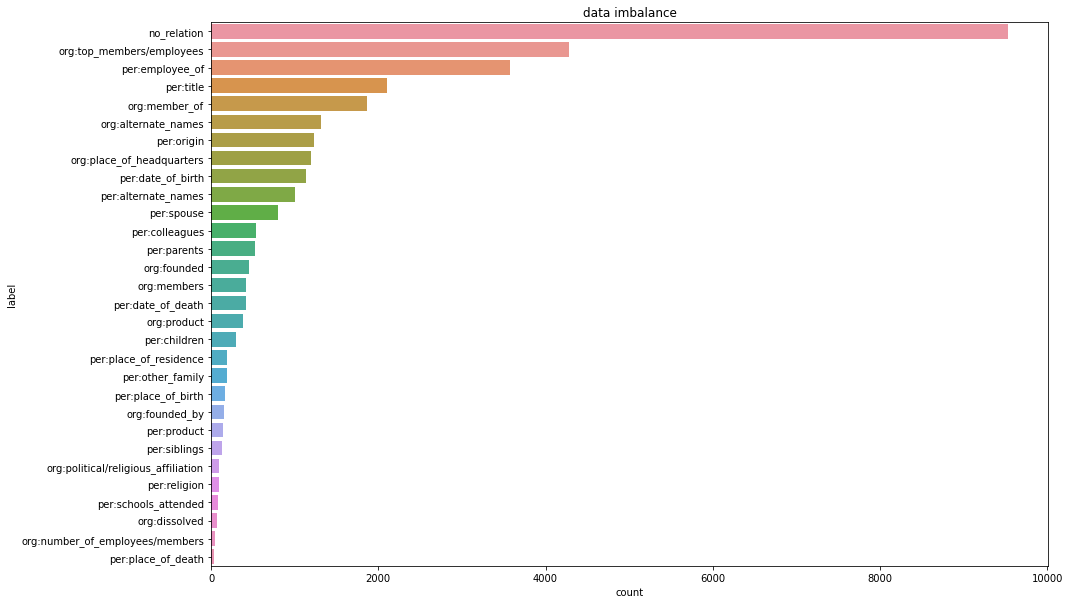

In [10]:
fig = plt.figure(figsize=(15, 10))
sns.countplot(y="label", data=dataset, order=dataset["label"].value_counts().index)
plt.title("data imbalance")
plt.show()

In [11]:
dataset.describe(include='all')

,id,sentence,subject_entity,object_entity,label
count,32470.000000,32470,32470,32470,32470
unique,NaN,28803,12052,10195,30
top,NaN,도쿠가와 이에야스와 도쿠가와 히데타다가 20년에 걸쳐 안정시킨 막부를 이어받은 3대...,'민주당','대한민국',no_relation
freq,NaN,3,144,276,9534
mean,16234.500000,NaN,NaN,NaN,NaN
std,9373.425957,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,8117.250000,NaN,NaN,NaN,NaN
50%,16234.500000,NaN,NaN,NaN,NaN
75%,24351.750000,NaN,NaN,NaN,NaN


In [12]:
#sentence중복 확인

cnt = 0
for i in range(len(dataset)):
    if dataset['sentence'][i] == '도쿠가와 이에야스와 도쿠가와 히데타다가 20년에 걸쳐 안정시킨 막부를 이어받은 3대 쇼군 도쿠가와 이에미쓰는 중신들에게 유교 사상을 철저히 연구할 것을 지시했고, 한편으로 도쿠가와 미쓰쿠니 등은 《대일본사》(大日本史)와 같은 역사서를 편찬하는 등 문치(文治)를 지향하였으며, 이를 바탕으로 5대 쇼군 도쿠가와 이에쓰나 대에 에도 막부는 겐로쿠 호황이라고 부르는 최대의 전성기를 맞이했다.':
        cnt += 1
print(cnt)

3


In [13]:
#subject와 object중복 확인

cnt = 0
for i in range(len(dataset)):
    if dataset['subject_entity'][i] == dataset['object_entity'][i]:
        cnt += 1
print(cnt)

0


#### sentence
##### 도쿠가와 이에야스와 도쿠가와 히데타다가 20년에 걸쳐 안정시킨 막부를 이어받은 3대 쇼군 도쿠가와 이에미쓰는 중신들에게 유교 사상을 철저히 연구할 것을 지시했고, 한편으로 도쿠가와 미쓰쿠니 등은 《대일본사》(大日本史)와 같은 역사서를 편찬하는 등 문치(文治)를 지향하였으며, 이를 바탕으로 5대 쇼군 도쿠가와 이에쓰나 대에 에도 막부는 겐로쿠 호황이라고 부르는 최대의 전성기를 맞이했다.


#### subject
##### {'word': '도쿠가와 이에미쓰', 'start_idx': 50, 'end_idx': 58, 'type': 'PER'}
##### {'word': '도쿠가와 히데타다', 'start_idx': 11, 'end_idx': 19, 'type': 'PER'}
##### {'word': '도쿠가와 이에야스', 'start_idx': 0, 'end_idx': 8, 'type': 'PER'}


#### object
##### {'word': '에도 막부', 'start_idx': 181, 'end_idx': 185, 'type': 'ORG'}


#### label
##### per:employee_of

In [14]:
dataset['sentence'].unique()

array(['〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.',
       '호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.',
       'K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.',
       ...,
       "완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 229개 기초지자체 중 최상위 등급인 A등급을 받으면서 전국에서 가장 높은 교통안전 인식 수준을 갖고 있는 것으로 나타났다.",
       '중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이사장, 한국기원 총재를 맡고 있다.',
       '화순군(군수 구충곤)은 17일 동면의 이장 20여 명이 코로나 19 예방을 위해 버스 승강장, 공중화장실 등 다중이용시설과 오동리 천운아파트 주변을 소독하는 방역 봉사활동을 펼쳤다고 밝혔다.'],
      dtype=object)

#### subject entitiy aug

###### sentence중복 없는 것 중
###### subject_entity 다음 단어가 '와'또는 '과'인 것에 대하여
###### 1. 해당 sentence 저장
###### 2. subject_entity는 와/과 다음 단어를 시작으로 하여 '은','는','이','가'까지 저장
###### 3. object_entity은 동일하게 저장
###### 위의 1, 2, 3을 dataframe으로 묶어서 dataset에 concatenation

###### ※',', '·'는 '와 '로 치환

#### object entitiy aug

###### sentence중복 없는 것 중
###### object_entity 다음 단어가 '와'또는 '과'인 것에 대하여
###### 1. 해당 sentence 저장
###### 2. subject_entity는 동일하게 저장
###### 3. object_entitiy는 와/과 다음 단어를 시작으로 하여 띄어쓰기기준 하나의 token저장
###### 4. 명사만 분리
###### 위의 1, 2, 3을 dataframe으로 묶어서 dataset에 concatenation

###### ※',', '·'는 '와 '로 치환

In [16]:
def subj_obj_check(dataset):
  subject_entity = []
  object_entity = []
  for i,j in zip(dataset['subject_entity'], dataset['object_entity']):
    i = i[1:-1].split(',')[-1].split(':')[1]
    j = j[1:-1].split(',')[-1].split(':')[1]

    subject_entity.append(i)
    object_entity.append(j)
  out_dataset = pd.DataFrame({'id':dataset['id'], 'sentence':dataset['sentence'],'subject_entity':subject_entity,'object_entity':object_entity,'label':dataset['label']})
  return out_dataset

In [17]:
df = pd.read_csv('/opt/ml/dataset/train/train.csv')
df = subj_obj_check(df)

In [18]:
df.head()

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,'ORG','PER',no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,'ORG','ORG',no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,'ORG','ORG',org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,'ORG','PER',org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,'ORG','DAT',no_relation


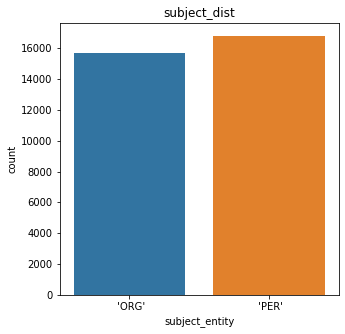

In [28]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x="subject_entity", data=df)
plt.title("subject_dist")
plt.show()

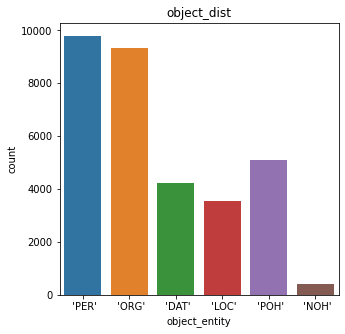

In [23]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x="object_entity", data=df)
plt.title("object_dist")
plt.show()

In [ ]:
# dataset = dataset
# targets = [imbalance한 데이터 라벨 리스트]
# labels = label

def augmentation(dataset, labels, targets):
    
    for idx, data in enumerate(dataset):
        if labels[idx] not in targets:
            continue
        #aumentation

        # 저장

In [ ]:
def remove_html(texts):
    """
    특수기호를 제거
    ``〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.`` -> ``Something는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 Abbey Road에 담은 노래다. ``
    """
    preprcessed_text = []
    for text in texts:
        text = #제거가능한 특수문자
        if text:
            preprcessed_text.append(text)
    return preprcessed_text

In [ ]:
def remove_repeated_spacing(texts):
    """
    두 개 이상의 연속된 공백을 하나로 치환
    """
    preprocessed_text = []
    for text in texts:
        text = re.sub(r"\s+", " ", text).strip()
        if text:
            preprocessed_text.append(text)
    return preprocessed_text